<a href="https://colab.research.google.com/github/chinthanajanakadev/colab-projects/blob/dev/anscombe_json_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

OTHM Practicles

In [ ]:
# prompt: summery of this file /content/sample_data/anscombe.json load to pd

import pandas as pd

# Load the JSON file into a pandas DataFrame
df = pd.read_json('/content/sample_data/anscombe.json')

# Print a summary of the DataFrame
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Series  44 non-null     object 
 1   X       44 non-null     int64  
 2   Y       44 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.2+ KB
None


In [ ]:
# prompt: first few rows of data df = pd.read_json('/content/sample_data/anscombe.json')

df.head()


,Series,X,Y
0,I,10,8.04
1,I,8,6.95
2,I,13,7.58
3,I,9,8.81
4,I,11,8.33


In [ ]:
# prompt: describe data frame

df.describe()



,X,Y
count,44.000000,44.000000
mean,9.000000,7.500455
std,3.198837,1.959244
min,4.000000,3.100000
25%,7.000000,6.117500
50%,8.000000,7.520000
75%,11.000000,8.747500
max,19.000000,12.740000


In [ ]:
# prompt: pandas df identify categorial columns

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns: {categorical_cols}")


Categorical columns: ['Series']


In [ ]:
# prompt: df summery of categorial data

df[categorical_cols].describe()


,Series
count,44
unique,4
top,I
freq,11


In [ ]:
# Function to get frequency summary of all categorical columns
def categorical_frequency_summary(df):
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    frequency_summary = {}

    for col in categorical_cols:
        frequency_summary[col] = df[col].value_counts()

    return frequency_summary

# Get the frequency summary
summary = categorical_frequency_summary(df)

# Print the summary
for col, freq in summary.items():
    print(f"Frequency summary for column '{col}':")
    print(freq)
    print()


Frequency summary for column 'Series':
Series
I      11
II     11
III    11
IV     11
Name: count, dtype: int64



In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the data
df['Series_encoded'] = label_encoder.fit_transform(df['Series'])

print(df.head(15))  # Display the first 15 rows to check the encoding
print("\nLabel Encoding Mapping:")
for category, code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{category}: {code}")

   Series   X      Y  Series_encoded
0       I  10   8.04               0
1       I   8   6.95               0
2       I  13   7.58               0
3       I   9   8.81               0
4       I  11   8.33               0
5       I  14   9.96               0
6       I   6   7.24               0
7       I   4   4.26               0
8       I  12  10.84               0
9       I   7   4.81               0
10      I   5   5.68               0
11     II  10   9.14               1
12     II   8   8.14               1
13     II  13   8.74               1
14     II   9   8.77               1

Label Encoding Mapping:
I: 0
II: 1
III: 2
IV: 3


In [ ]:
# prompt: get df without "Series"

df = df.drop('Series', axis=1)


In [ ]:
df.describe()
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   X               44 non-null     int64  
 1   Y               44 non-null     float64
 2   Series_encoded  44 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.2 KB
None


,X,Y,Series_encoded
0,10,8.04,0
1,8,6.95,0
2,13,7.58,0
3,9,8.81,0
4,11,8.33,0


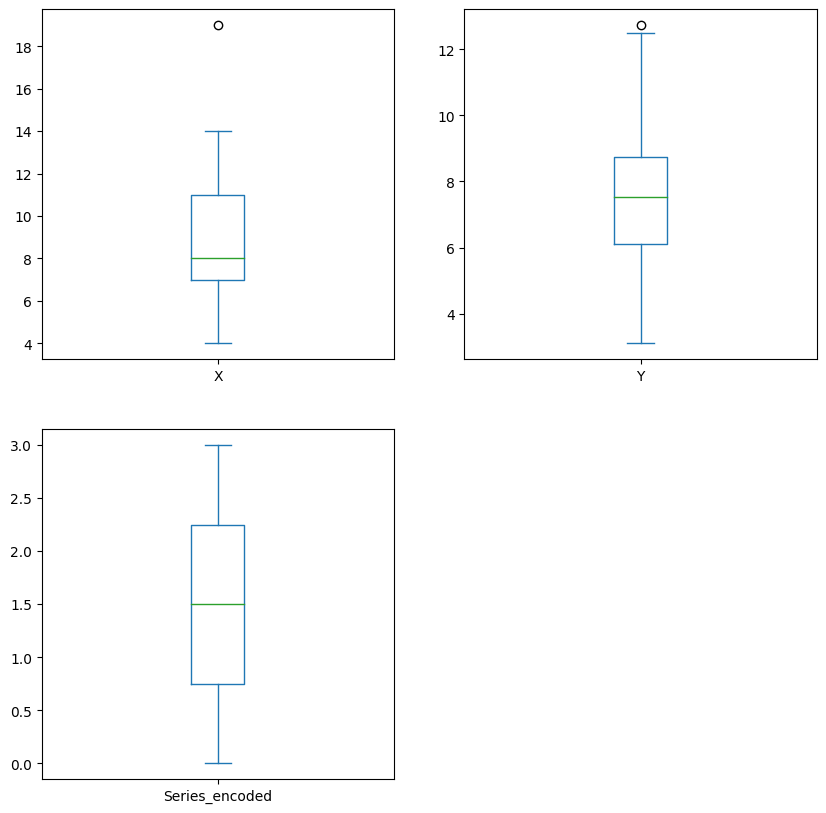

In [ ]:
# prompt: df features box plots

import matplotlib.pyplot as plt

# Create boxplots for all numeric columns
df.plot(kind='box', subplots=True, layout=(2, 2), figsize=(10, 10))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plots
plt.show()


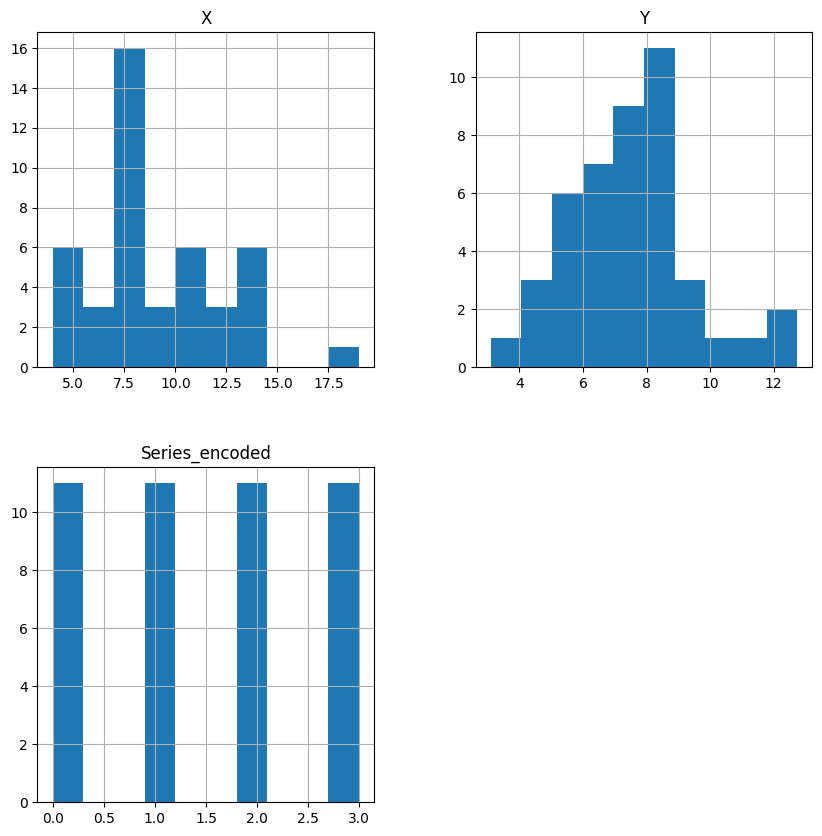

In [ ]:
# prompt: df features histograms

import matplotlib.pyplot as plt
# Create histograms for all numeric columns
df.hist(figsize=(10, 10), bins=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plots
plt.show()


In [ ]:
# prompt: for all  features in df  remove outliers using iqr

import pandas as pd
def remove_outliers_IQR(df, features):
  """
  This function removes outliers for a list of features in a DataFrame using the Interquartile Range (IQR) method.

  Args:
      df (pd.DataFrame): The DataFrame containing the data.
      features (list): A list of feature names.

  Returns:
      pd.DataFrame: The DataFrame with outliers removed for the specified features.
  """

  for feature in features:
    # Calculate Q1, Q3 and IQR
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Select rows within the bounds
    df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

  return df

# Remove outliers for all features
df = remove_outliers_IQR(df, df.columns)

# Print the updated DataFrame
print(df.head())



    X     Y  Series_encoded
0  10  8.04               0
1   8  6.95               0
2  13  7.58               0
3   9  8.81               0
4  11  8.33               0


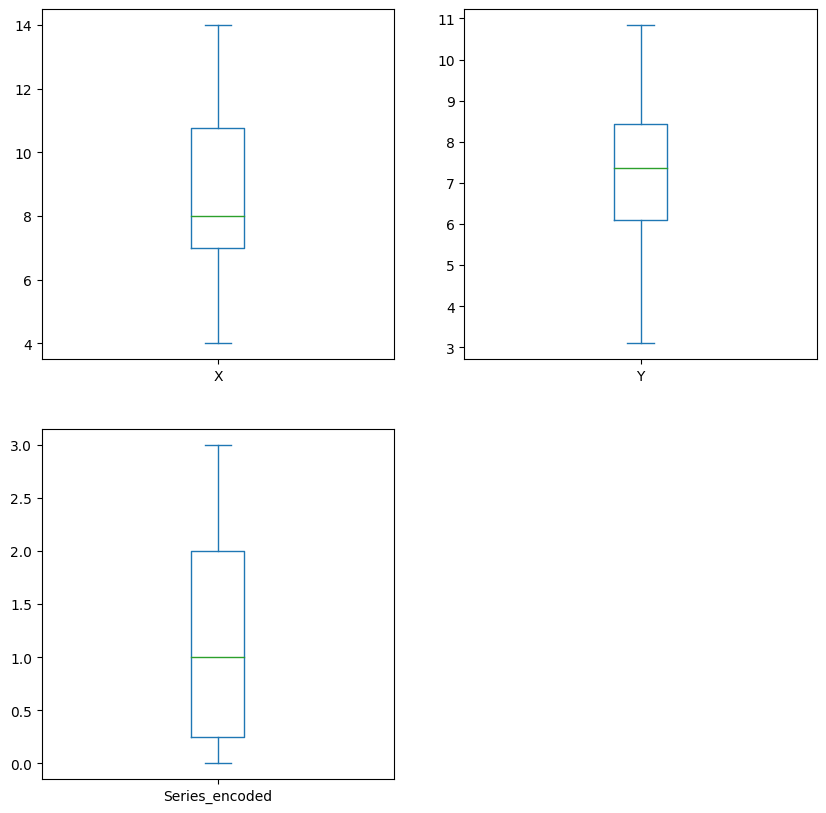

In [ ]:
# prompt: df features box plot

import matplotlib.pyplot as plt
# Create boxplots for all numeric features
df.plot(kind='box', subplots=True, layout=(2, 2), figsize=(10, 10))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plots
plt.show()


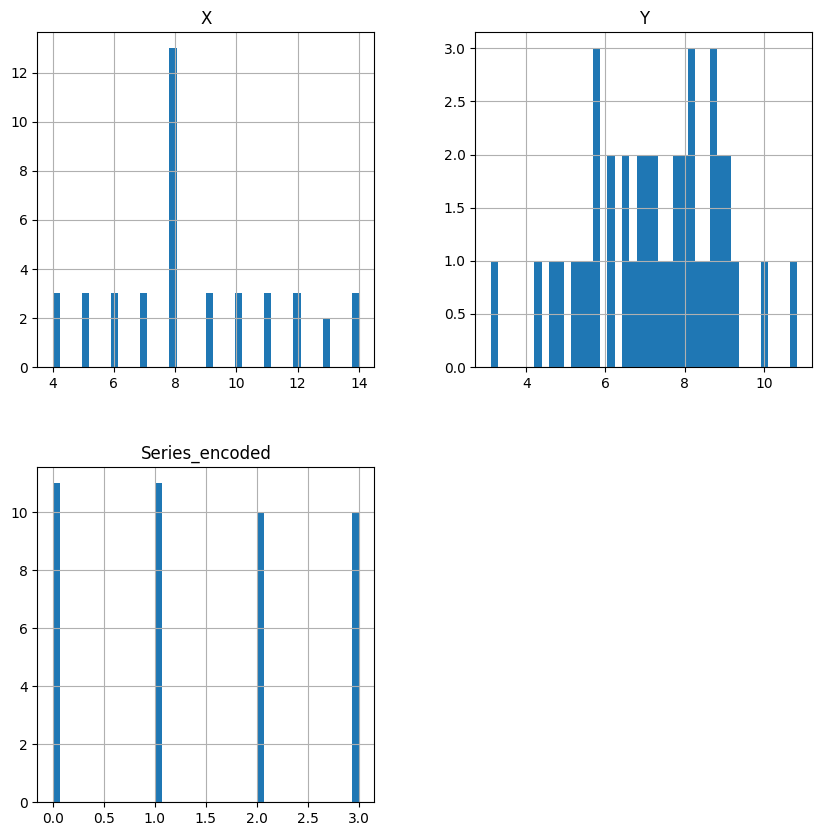

In [ ]:
# prompt: df features histograms

import matplotlib.pyplot as plt
# Create histograms for all numeric features in the DataFrame
df.hist(figsize=(10, 10), bins=42)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plots
plt.show()


In [ ]:
df.describe()
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, 0 to 43
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   X               42 non-null     int64  
 1   Y               42 non-null     float64
 2   Series_encoded  42 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.3 KB
None


,X,Y,Series_encoded
0,10,8.04,0
1,8,6.95,0
2,13,7.58,0
3,9,8.81,0
4,11,8.33,0


In [ ]:
# prompt: df create new df_normalize using suitable scaler

from sklearn.preprocessing import MinMaxScaler

# Create a new DataFrame for normalized data
df_normalized = df.copy()

# Instantiate the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the data and transform it
df_normalized[df.columns] = scaler.fit_transform(df)

# Print the normalized data
df_normalized.head()


,X,Y,Series_encoded
0,0.6,0.638243,0.0
1,0.4,0.497416,0.0
2,0.9,0.578811,0.0
3,0.5,0.737726,0.0
4,0.7,0.675711,0.0


In [ ]:
# prompt: df_normalized info, describe , head

print(df_normalized.info())

print(df_normalized.describe())

df_normalized.head()


<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, 0 to 43
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   X               42 non-null     float64
 1   Y               42 non-null     float64
 2   Series_encoded  42 non-null     float64
dtypes: float64(3)
memory usage: 1.3 KB
None
               X          Y  Series_encoded
count  42.000000  42.000000       42.000000
mean    0.466667   0.537037        0.484127
std     0.279081   0.211736        0.376853
min     0.000000   0.000000        0.000000
25%     0.300000   0.386628        0.083333
50%     0.400000   0.550388        0.333333
75%     0.675000   0.689276        0.666667
max     1.000000   1.000000        1.000000


,X,Y,Series_encoded
0,0.6,0.638243,0.0
1,0.4,0.497416,0.0
2,0.9,0.578811,0.0
3,0.5,0.737726,0.0
4,0.7,0.675711,0.0


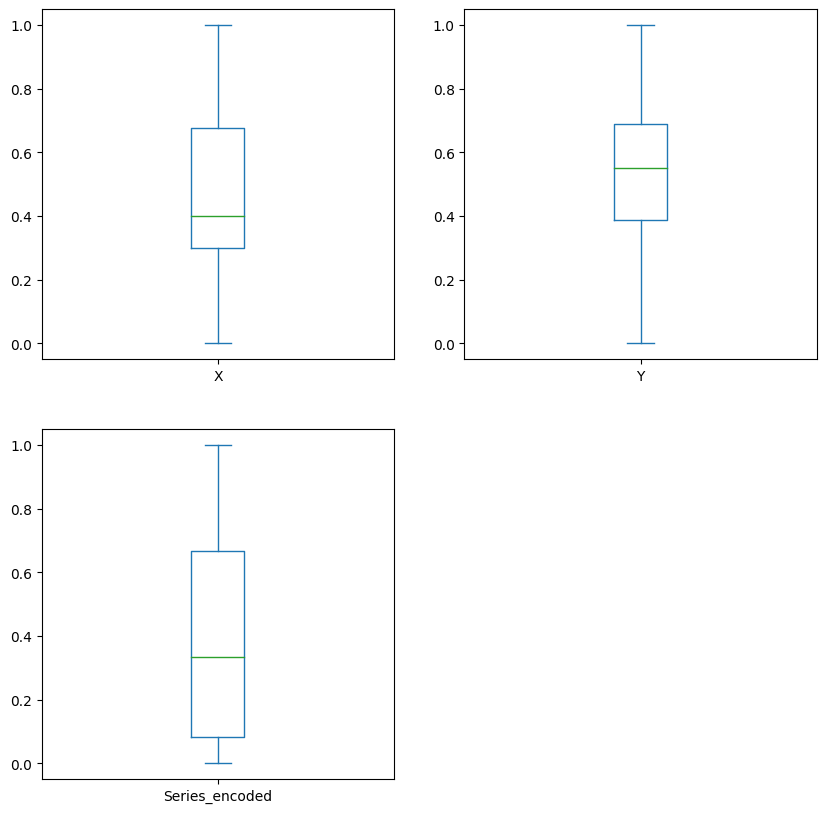

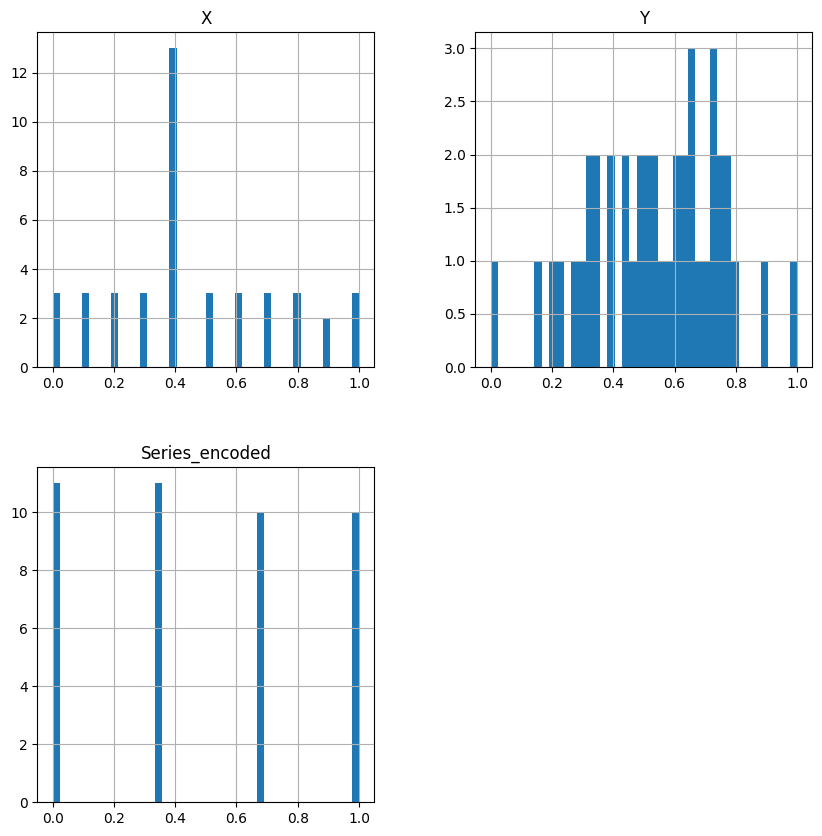

In [ ]:
# prompt: df_normalized features  histograms, boxplots

import matplotlib.pyplot as plt
# Create boxplots for all features in the normalized data
df_normalized.plot(kind='box', subplots=True, layout=(2, 2), figsize=(10, 10))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plots
plt.show()


# Create histograms for all features in the normalized data
df_normalized.hist(figsize=(10, 10), bins=42)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plots
plt.show()


                       X         Y  Series_encoded
X               1.000000  0.776572       -0.136567
Y               0.776572  1.000000       -0.139494
Series_encoded -0.136567 -0.139494        1.000000


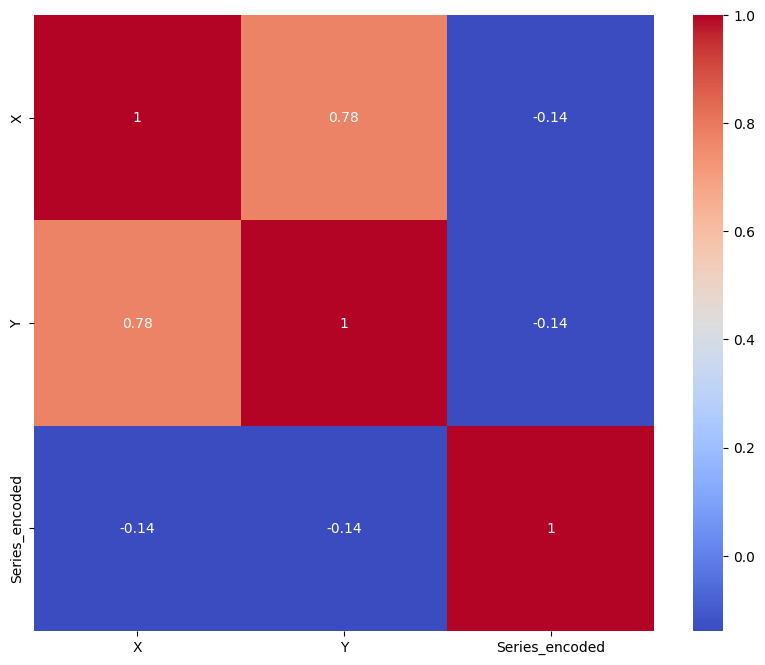

In [ ]:
# prompt: df_normalized corr matrix and plot corr
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the correlation matrix of the normalized data
corr_matrix = df_normalized.corr()

# Print the correlation matrix
print(corr_matrix)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()
